### Trabalho 1

Seguem instruções:

1) Baixar dataset em : https://www.kaggle.com/c/home-credit-default-risk/data

2) Explorar, conforme instruções:

* 'application_train.csv': Esse csv possui 122 colunas: explorar 40 colunas, sendo as primeiras 30 obrigatórias e 10 adicionais a escolher
* 30 colunas obrigatórias:

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
       
* alunos deverão se organizar para que todas as colunas sejam exploradas
* escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'

['HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']
 
3) objetivos:
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariadaj, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) entregável: jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) entrega limite: 8/agosto/2018 

6) trabalho individual. Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) avaliação:
   - jupyter notebook e arguição (se houver)
   
### Problema de Negócio

##### Do Kaggle:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

##### Entendimento do problema:

Como fornecer crédito para pessoas com histórico insuficiente ou inexistente?

Utilizando estes dados alternativos, pode ser criado um modelo preditivo quer será usado para fazer uma análise das pessoas, para saber se elas tem um histórico de bom pagamento, e fornecer crédito para estas pessoas.

#### Importando as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as mn

import seaborn as sns

In [2]:
pd.__version__

'0.24.2'

In [3]:
df = pd.read_csv('Dados/application_train.csv',index_col=0)

In [5]:
df30 = df.iloc[:,0:30]

In [6]:
df30.shape

(307511, 30)

In [7]:
df30.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,NaN,1,1,0,1,1,0,Laborers,1.0,2
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,1,1,0,1,1,0,Core staff,2.0,1
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,26.0,1,1,1,1,1,0,Laborers,1.0,2
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,1,1,0,1,0,0,Laborers,2.0,2
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,1,1,0,1,0,0,Core staff,1.0,2


In [8]:
df30.to_csv('Dados/application_train_30.csv')

In [9]:
del df

In [9]:
df30 = pd.read_csv('Dados/application_train_30.csv',index_col=0)

In [10]:
df30.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 30 columns):
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307

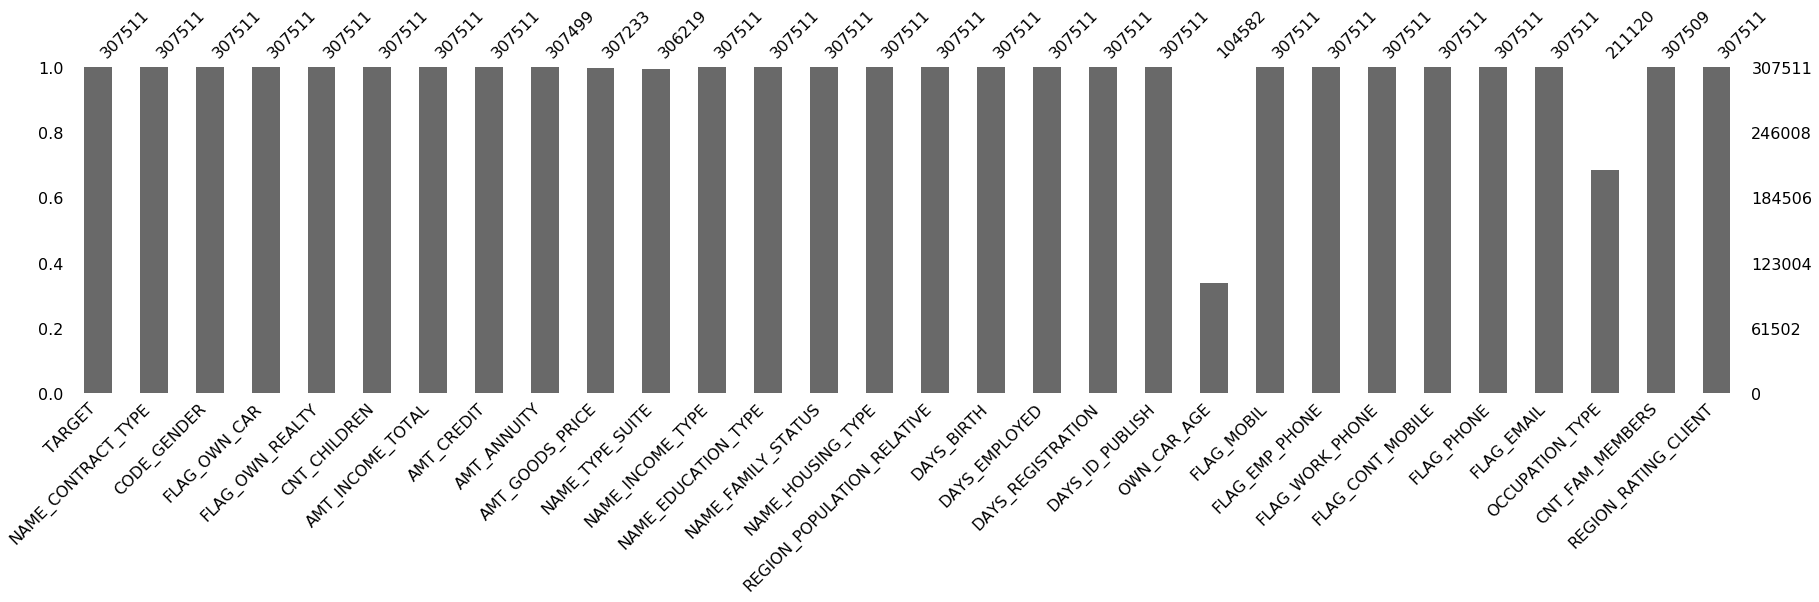

In [11]:
mn.bar(df30,figsize=(30,6))

#### Tratamento de NaNs

Temos algumas variáveis com Nans:

    AMT_ANNUITY                   307499 non-null float64
    AMT_GOODS_PRICE               307233 non-null float64
    NAME_TYPE_SUITE               306219 non-null object
    OWN_CAR_AGE                   104582 non-null float64
    OCCUPATION_TYPE               211120 non-null object
    CNT_FAM_MEMBERS               307509 non-null float64

#### Verificando 
    AMT_ANNUITY                   307499 non-null float64

In [12]:
df30.AMT_ANNUITY.head()

SK_ID_CURR
100002    24700.5
100003    35698.5
100004     6750.0
100006    29686.5
100007    21865.5
Name: AMT_ANNUITY, dtype: float64

Substituo os 12 NaNs pela média destes números

In [13]:
df30.AMT_ANNUITY.fillna(df30.AMT_ANNUITY.mean(), inplace = True)

#### Verificando 
    AMT_GOODS_PRICE               307233 non-null float64

In [14]:
df30.AMT_GOODS_PRICE.head()

SK_ID_CURR
100002     351000.0
100003    1129500.0
100004     135000.0
100006     297000.0
100007     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

Substituo os 1292 NaNs pela média destes números

In [15]:
df30.AMT_GOODS_PRICE.fillna(df30.AMT_GOODS_PRICE.mean(), inplace = True)

#### Verificando 
    NAME_TYPE_SUITE               306219 non-null object

In [16]:
df30.NAME_TYPE_SUITE.head()

SK_ID_CURR
100002    Unaccompanied
100003           Family
100004    Unaccompanied
100006    Unaccompanied
100007    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [17]:
set(df30.NAME_TYPE_SUITE)

{'Children',
 'Family',
 'Group of people',
 'Other_A',
 'Other_B',
 'Spouse, partner',
 'Unaccompanied',
 nan}

Por serem valores alfanuméricos, substituo os NaN por 'Unknown' 

In [18]:
df30.NAME_TYPE_SUITE.fillna('Unknown', inplace = True)

In [19]:
set(df30.NAME_TYPE_SUITE)

{'Children',
 'Family',
 'Group of people',
 'Other_A',
 'Other_B',
 'Spouse, partner',
 'Unaccompanied',
 'Unknown'}

#### Verificando 
    OWN_CAR_AGE                   104582 non-null float64
    
Neste caso temos duas variáveis relacionadas
    OWN_CAR_AGE
e
    FLAG_OWN_CAR
    
Se a pessoa não possui carro (FLAG_OWN_CAR = N), então faz sentido o OWN_CAR_AGE ser igual a NaN

In [20]:
df30[['FLAG_OWN_CAR','OWN_CAR_AGE']].describe

<bound method NDFrame.describe of            FLAG_OWN_CAR  OWN_CAR_AGE
SK_ID_CURR                          
100002                N          NaN
100003                N          NaN
100004                Y         26.0
100006                N          NaN
100007                N          NaN
100008                N          NaN
100009                Y         17.0
100010                Y          8.0
100011                N          NaN
100012                N          NaN
100014                N          NaN
100015                N          NaN
100016                N          NaN
100017                Y         23.0
100018                N          NaN
100019                Y         17.0
100020                N          NaN
100021                N          NaN
100022                N          NaN
100023                N          NaN
100024                Y          7.0
100025                Y         14.0
100026                N          NaN
100027                N          NaN
1000

Com o resultado acima, confirmamos que OWN_CAR_AGE é NaN quando FLAG_OWN_CAR = N. Vamos atribuir o valor -1 para estes casos

In [21]:
df30.OWN_CAR_AGE.fillna(-1, inplace = True)

In [22]:
df30.OWN_CAR_AGE.head()

SK_ID_CURR
100002    -1.0
100003    -1.0
100004    26.0
100006    -1.0
100007    -1.0
Name: OWN_CAR_AGE, dtype: float64

#### Verificando 
    OCCUPATION_TYPE               211120 non-null object

In [23]:
df30.OCCUPATION_TYPE.head()

SK_ID_CURR
100002      Laborers
100003    Core staff
100004      Laborers
100006      Laborers
100007    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [24]:
df30.OCCUPATION_TYPE.fillna('Unknown', inplace = True)

#### Verificando 
    CNT_FAM_MEMBERS               307509 non-null float64

In [25]:
df30.CNT_FAM_MEMBERS.head()

SK_ID_CURR
100002    1.0
100003    2.0
100004    1.0
100006    2.0
100007    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [26]:
set(df30.CNT_FAM_MEMBERS)

{nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 nan,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 20.0}

Existem 3 variáveis relativas a família: 'CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS'. Vamos ver como podemos subtituir os NaNs de CNT_FAM_MEMBERS: 

In [27]:
#pd.isnull(df40).any(1).nonzero()[0]
df30[pd.isnull(df30['CNT_FAM_MEMBERS'])]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,538396.207429,...,-1.0,1,1,1,1,1,0,Managers,NaN,2
317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,538396.207429,...,-1.0,1,1,0,1,0,0,Accountants,NaN,2


In [28]:
df30.loc[[148605],['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']]

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
SK_ID_CURR,,,
148605,0,Unknown,NaN


In [29]:
df30.loc[[317181],['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']]

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
SK_ID_CURR,,,
317181,0,Unknown,NaN


Como estes valores não podem ser encontrados, vamos apagar os NaNs que sobraram antes de transformar o dataframe em um dataframe com dummies, para podermos montar as correlações.

In [40]:
df30.dropna(inplace=True)

Confirmando que não existem mais NaNs no dataframe

In [41]:
df30.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 100002 to 456255
Data columns (total 30 columns):
TARGET                        307509 non-null int64
NAME_CONTRACT_TYPE            307509 non-null object
CODE_GENDER                   307509 non-null object
FLAG_OWN_CAR                  307509 non-null object
FLAG_OWN_REALTY               307509 non-null object
CNT_CHILDREN                  307509 non-null int64
AMT_INCOME_TOTAL              307509 non-null float64
AMT_CREDIT                    307509 non-null float64
AMT_ANNUITY                   307509 non-null float64
AMT_GOODS_PRICE               307509 non-null float64
NAME_TYPE_SUITE               307509 non-null object
NAME_INCOME_TYPE              307509 non-null object
NAME_EDUCATION_TYPE           307509 non-null object
NAME_FAMILY_STATUS            307509 non-null object
NAME_HOUSING_TYPE             307509 non-null object
REGION_POPULATION_RELATIVE    307509 non-null float64
DAYS_BIRTH                    307

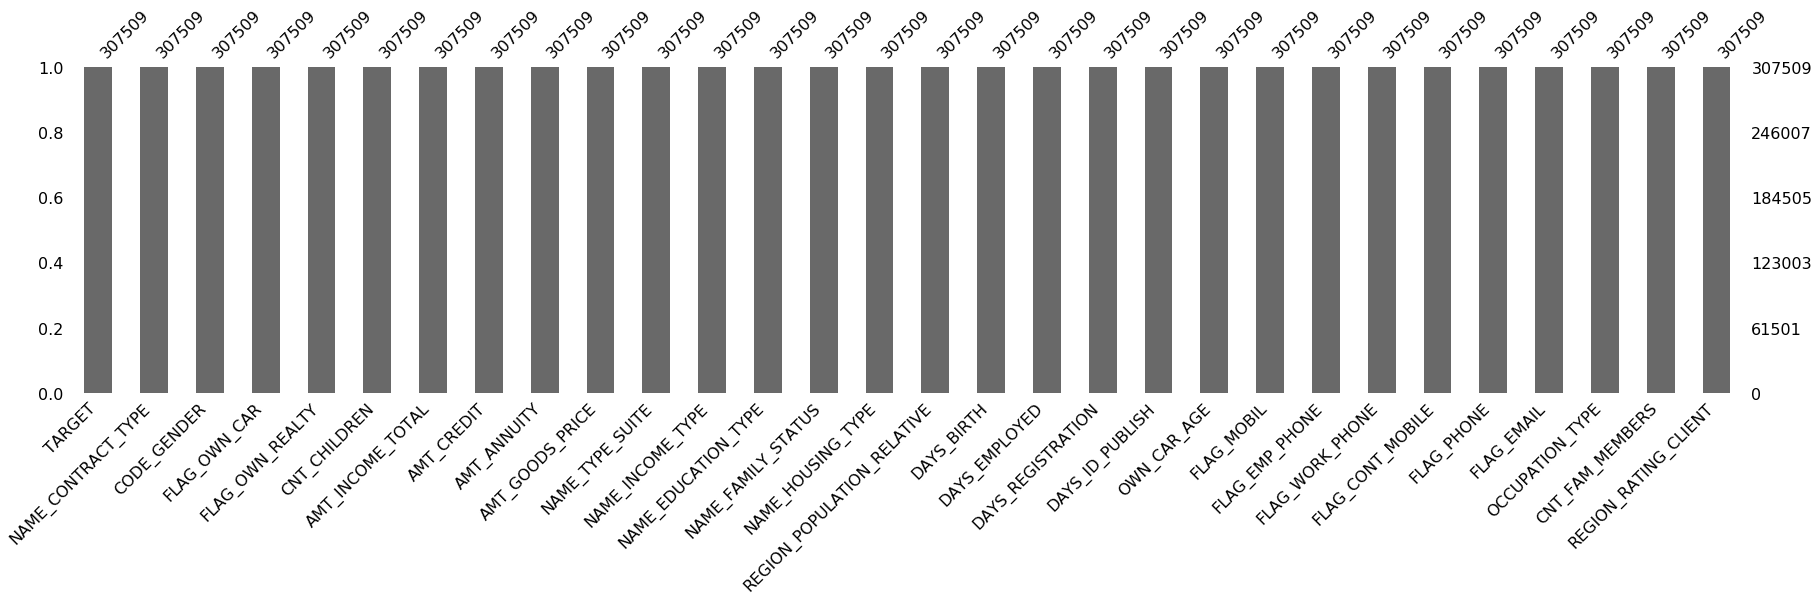

In [42]:
mn.bar(df30,figsize=(30,6))

Salvamos a tabela em um novo CSV

In [43]:
df30.to_csv('Dados/application_train_30v2.csv')

Iniciamos o tratamento de dummies, primeiro carregando novamente a tabela e em seguida criando um novo dataframe de dummies

In [51]:
df30 = pd.read_csv('Dados/application_train_30v2.csv', index_col=0)

Criamos um dataframe com os dummies

In [44]:
df30 = pd.get_dummies(df30)

In [45]:
df30.shape

(307509, 80)

Como os valores foram convertidos, novas colunas são criadas, a seguir vemos a estrutura do dataframe

In [46]:
df30.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 100002 to 456255
Data columns (total 80 columns):
TARGET                                               307509 non-null int64
CNT_CHILDREN                                         307509 non-null int64
AMT_INCOME_TOTAL                                     307509 non-null float64
AMT_CREDIT                                           307509 non-null float64
AMT_ANNUITY                                          307509 non-null float64
AMT_GOODS_PRICE                                      307509 non-null float64
REGION_POPULATION_RELATIVE                           307509 non-null float64
DAYS_BIRTH                                           307509 non-null int64
DAYS_EMPLOYED                                        307509 non-null int64
DAYS_REGISTRATION                                    307509 non-null float64
DAYS_ID_PUBLISH                                      307509 non-null int64
OWN_CAR_AGE                                    

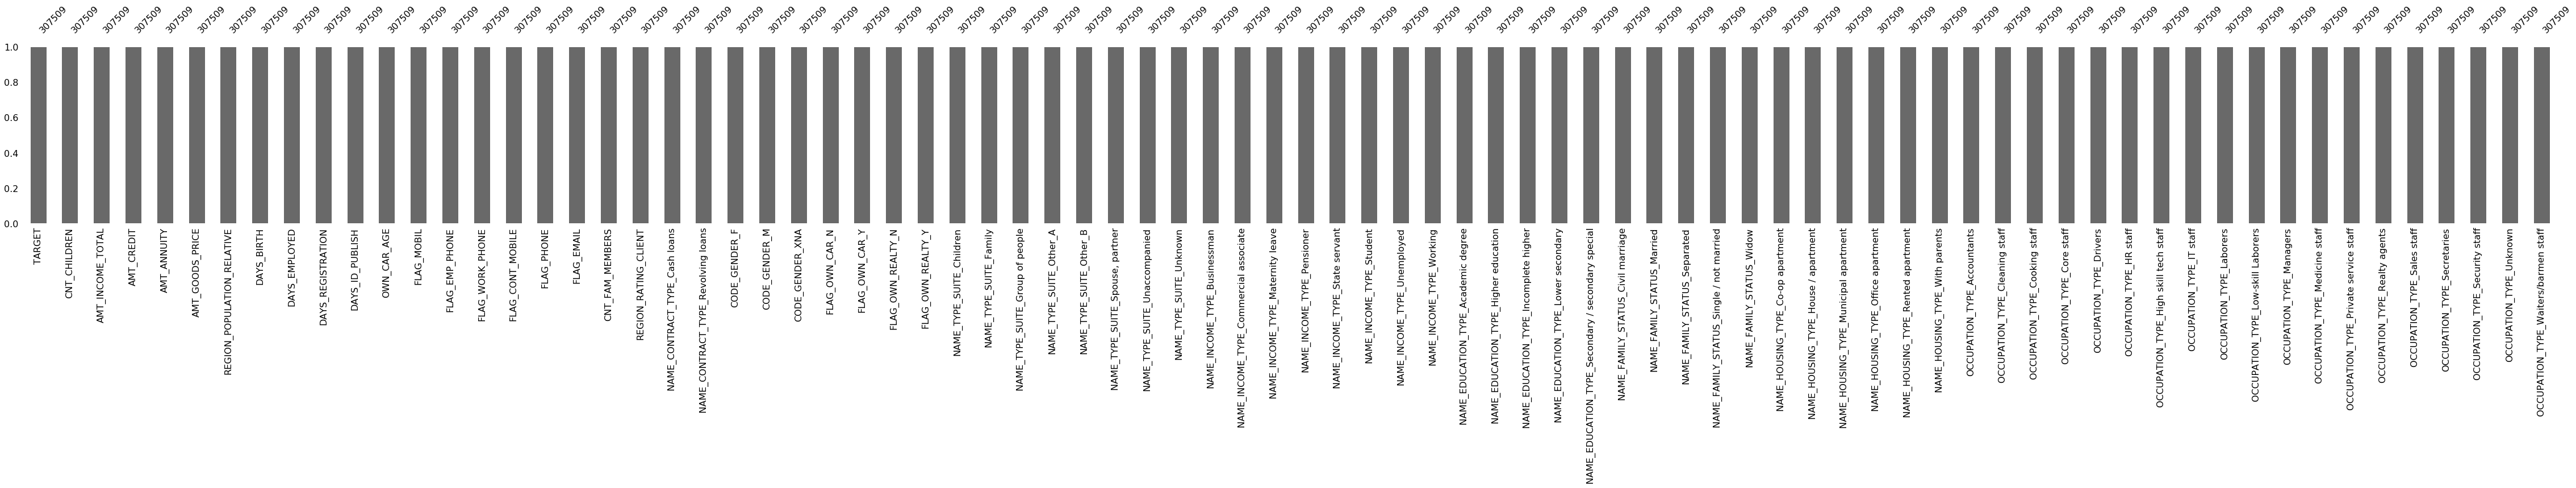

In [47]:
mn.bar(df30,figsize=(80,6))

In [48]:
df30.to_csv('Dados/application_train_30_dummies.csv')

In [57]:
df30 = pd.read_csv('Dados/application_train_30_dummies.csv', index_col=0)

In [49]:
df30.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,0,0,0,0
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0,0,0,0,0,0
100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


Imprimindo as correlações

In [51]:
df30.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
TARGET,1.000000,0.019186,-0.003981,-0.030369,-0.012816,-0.039628,-0.037227,0.078241,-0.044933,0.041976,...,0.027591,-0.018645,-0.008515,-0.005047,-0.000394,0.019537,-0.002452,0.014648,-0.038691,0.007802
CNT_CHILDREN,0.019186,1.000000,0.012885,0.002146,0.021375,-0.001826,-0.025572,0.330942,-0.239820,0.183399,...,0.004935,0.035003,0.019643,0.012564,0.006459,0.040247,0.009265,-0.008440,-0.175991,0.003259
AMT_INCOME_TOTAL,-0.003981,0.012885,1.000000,0.156870,0.191656,0.159601,0.074797,0.027257,-0.064222,0.027803,...,-0.012418,0.105489,-0.013602,0.005325,0.005468,-0.023748,-0.002273,-0.012062,-0.043544,-0.006863
AMT_CREDIT,-0.030369,0.002146,0.156870,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,0.009621,...,-0.028910,0.119548,0.003529,0.007332,0.006915,-0.030339,-0.000893,-0.015578,-0.041460,-0.017735
AMT_ANNUITY,-0.012816,0.021375,0.191656,0.770127,1.000000,0.774661,0.118424,0.009444,-0.104331,0.038512,...,-0.022121,0.146184,-0.014408,0.013856,0.010652,-0.023036,-0.001149,-0.021068,-0.069903,-0.013056
AMT_GOODS_PRICE,-0.039628,-0.001826,0.159601,0.986588,0.774661,1.000000,0.103482,-0.053416,-0.064826,0.011561,...,-0.031331,0.126882,0.001040,0.007059,0.006543,-0.031279,-0.000809,-0.018242,-0.039169,-0.017850
REGION_POPULATION_RELATIVE,-0.037227,-0.025572,0.074797,0.099738,0.118424,0.103482,1.000000,-0.029583,-0.003979,-0.053822,...,-0.009563,0.030222,-0.013389,0.009707,0.003123,-0.022712,0.007291,-0.013490,0.017411,-0.004974
DAYS_BIRTH,0.078241,0.330942,0.027257,-0.055436,0.009444,-0.053416,-0.029583,1.000000,-0.615864,0.331910,...,0.034514,0.041441,0.018438,0.038386,0.023341,0.156950,0.030552,-0.016987,-0.431882,0.045354
DAYS_EMPLOYED,-0.044933,-0.239820,-0.064222,-0.066838,-0.104331,-0.064826,-0.003979,-0.615864,1.000000,-0.210240,...,-0.038369,-0.128782,-0.080816,-0.043608,-0.022975,-0.158336,-0.030694,-0.069537,0.693370,-0.030853
DAYS_REGISTRATION,0.041976,0.183399,0.027803,0.009621,0.038512,0.011561,-0.053822,0.331910,-0.210240,1.000000,...,0.008048,0.044287,0.003273,0.019382,0.013896,0.042791,0.007814,-0.007862,-0.151509,0.007246


Alugns gráficos desta tabela

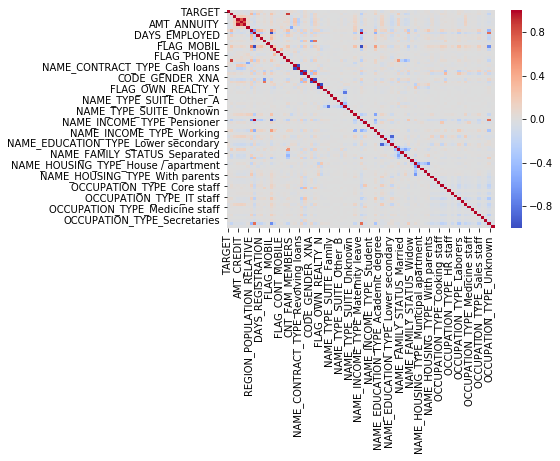

In [52]:
sns.heatmap(df30.corr(), cmap='coolwarm')

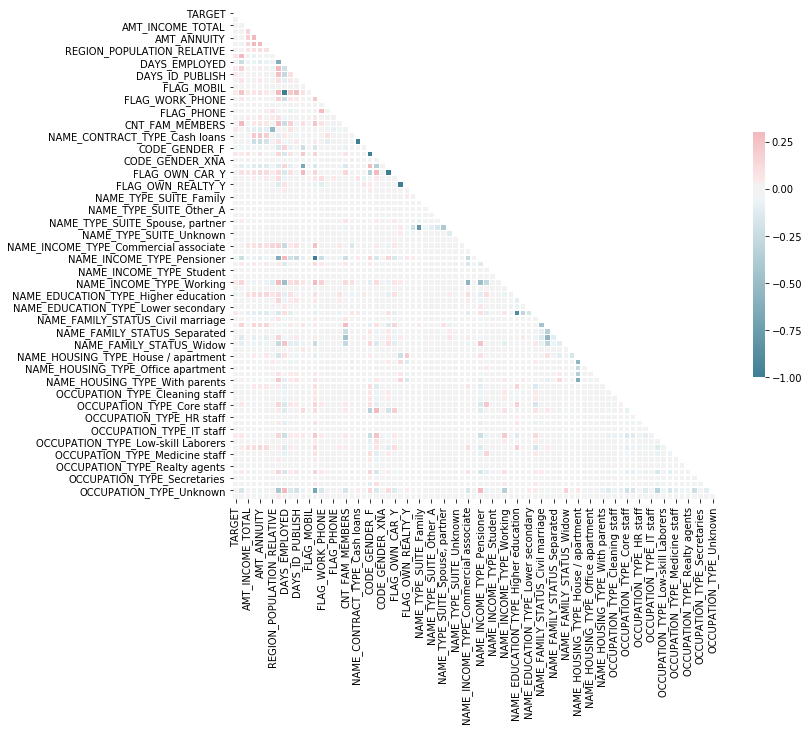

In [53]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df30.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df30.corr().round(2), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [56]:
#df.head().V.plot(kind = 'pie')
target = dict(ACEITO=df30.TARGET.loc[df30.TARGET == 0].count()/df30.TARGET.count(), 
              REJEITADO=df30.TARGET.loc[df30.TARGET == 1].count()/df30.TARGET.count())

([<matplotlib.patches.Wedge at 0x1261407f0>,
 [Text(-1.064811856530597, 0.27599947498475996, 'ACEITO'),
  Text(1.0648118371498927, -0.27599954975592034, 'REJEITADO')])

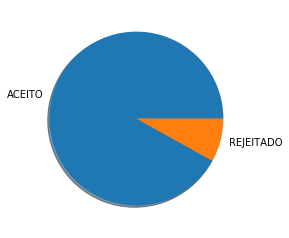

In [57]:
plt.pie(target.values(), labels=target.keys(),shadow=True)

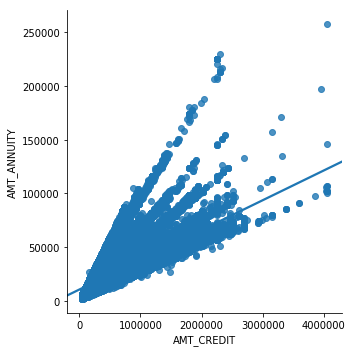

In [58]:
sns.lmplot(data=df30,x = 'AMT_CREDIT', y='AMT_ANNUITY')

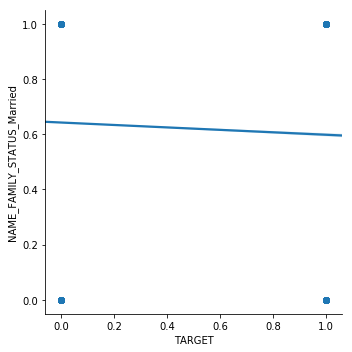

In [59]:
sns.lmplot(data=df30, x='TARGET', y='NAME_FAMILY_STATUS_Married')

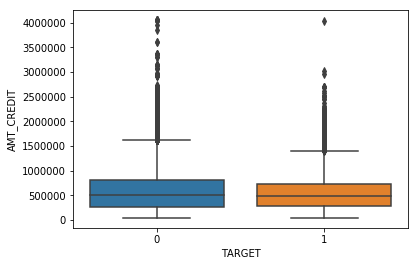

In [60]:
sns.boxplot(data=df30, x='TARGET', y='AMT_CREDIT')

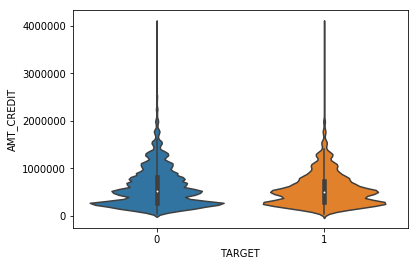

In [61]:
sns.violinplot(data=df30, x='TARGET', y='AMT_CREDIT')

In [62]:
pd.crosstab(df30.TARGET,df30.AMT_INCOME_TOTAL,normalize=True)

AMT_INCOME_TOTAL,25650.0,26100.0,26460.0,26550.0,27000.0,27585.0,27900.0,27967.5,28161.0,28350.0,...,3375000.0,3600000.0,3825000.0,3950059.5,4500000.0,6750000.0,9000000.0,13500000.0,18000090.0,117000000.0
TARGET,,,,,,,,,,,,,,,,,,,,,
0,0.000003,0.00001,0.000003,0.000007,0.000205,0.000003,0.000020,0.000003,0.000003,0.000036,...,0.000007,0.000007,0.000003,0.000003,0.000013,0.000003,0.000003,0.000003,0.000003,0.000000
1,0.000003,0.00000,0.000000,0.000000,0.000010,0.000000,0.000003,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003


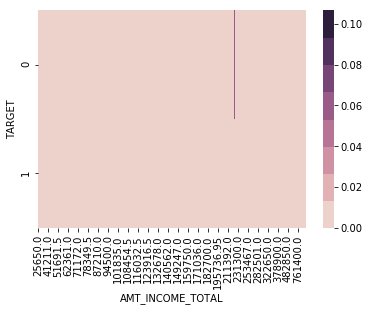

In [63]:
sns.heatmap(pd.crosstab(df30.TARGET,df30.AMT_INCOME_TOTAL,normalize=True), cmap=sns.cubehelix_palette(8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d65d1d0>,
      dtype=object)

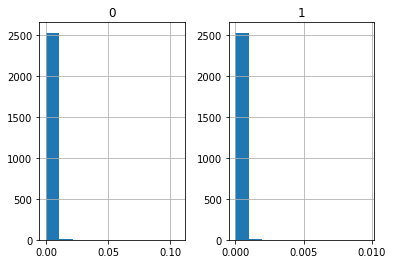

In [64]:
pd.crosstab(df30.AMT_INCOME_TOTAL,df30.TARGET,normalize=True).hist(bins=10)

Analisando as correlações mais altas, para serem usadas na geração dos gráficos

In [65]:
df30.corr().abs().unstack().sort_values(ascending=False)[97:].head(30)

NAME_EDUCATION_TYPE_Secondary / secondary special  NAME_EDUCATION_TYPE_Higher education       0.888008
CNT_CHILDREN                                       CNT_FAM_MEMBERS                            0.879161
CNT_FAM_MEMBERS                                    CNT_CHILDREN                               0.879161
NAME_TYPE_SUITE_Unaccompanied                      NAME_TYPE_SUITE_Family                     0.795448
NAME_TYPE_SUITE_Family                             NAME_TYPE_SUITE_Unaccompanied              0.795448
AMT_GOODS_PRICE                                    AMT_ANNUITY                                0.774661
AMT_ANNUITY                                        AMT_GOODS_PRICE                            0.774661
                                                   AMT_CREDIT                                 0.770127
AMT_CREDIT                                         AMT_ANNUITY                                0.770127
OCCUPATION_TYPE_Unknown                            FLAG_EMP_PHONE        

# Revisão:

Os gráficos acima foram gerados escolhendo variáveis aleatórias. A partir desta revisão os gráficos e as análises serão mais bem feitas.

Ajustando o dataframe para fazermos uma avaliação melhor.

Aqui vou abrir o último arquivo salvo, com NaN's e Dummies tratados e selecionando as Features que vou usar usando Scikit-Learn

In [215]:
import pandas as pd
import numpy as np

In [216]:
from sklearn import feature_selection

In [217]:
fs = feature_selection.SelectPercentile(feature_selection.f_classif, percentile=50)

In [218]:
df = pd.read_csv('application_train_30_dummies.csv', index_col=0)

In [219]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 100002 to 456255
Data columns (total 80 columns):
TARGET                                               307509 non-null int64
CNT_CHILDREN                                         307509 non-null int64
AMT_INCOME_TOTAL                                     307509 non-null float64
AMT_CREDIT                                           307509 non-null float64
AMT_ANNUITY                                          307509 non-null float64
AMT_GOODS_PRICE                                      307509 non-null float64
REGION_POPULATION_RELATIVE                           307509 non-null float64
DAYS_BIRTH                                           307509 non-null int64
DAYS_EMPLOYED                                        307509 non-null int64
DAYS_REGISTRATION                                    307509 non-null float64
DAYS_ID_PUBLISH                                      307509 non-null int64
OWN_CAR_AGE                                    

In [220]:
df_simp = df[:-306000]

In [221]:
df_simp.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 100002 to 101773
Data columns (total 80 columns):
TARGET                                               1509 non-null int64
CNT_CHILDREN                                         1509 non-null int64
AMT_INCOME_TOTAL                                     1509 non-null float64
AMT_CREDIT                                           1509 non-null float64
AMT_ANNUITY                                          1509 non-null float64
AMT_GOODS_PRICE                                      1509 non-null float64
REGION_POPULATION_RELATIVE                           1509 non-null float64
DAYS_BIRTH                                           1509 non-null int64
DAYS_EMPLOYED                                        1509 non-null int64
DAYS_REGISTRATION                                    1509 non-null float64
DAYS_ID_PUBLISH                                      1509 non-null int64
OWN_CAR_AGE                                          1509 non-null floa

In [222]:
classes = df_simp.TARGET

In [223]:
print(classes)

SK_ID_CURR
100002    1
100003    0
100004    0
100006    0
100007    0
100008    0
100009    0
100010    0
100011    0
100012    0
100014    0
100015    0
100016    0
100017    0
100018    0
100019    0
100020    0
100021    0
100022    0
100023    0
100024    0
100025    0
100026    0
100027    0
100029    0
100030    0
100031    1
100032    0
100033    0
100034    0
         ..
101739    0
101740    0
101741    0
101742    0
101743    0
101744    0
101745    0
101746    0
101747    0
101748    0
101749    0
101750    0
101751    0
101752    0
101753    0
101754    0
101755    0
101756    0
101760    0
101761    0
101763    0
101765    0
101766    0
101767    0
101768    0
101769    0
101770    0
101771    0
101772    1
101773    0
Name: TARGET, Length: 1509, dtype: int64


In [224]:
X_treino_fs = fs.fit_transform(df_simp,classes)

C:\Users\risquass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 0 12 24 37 39 42 45] are constant.
  UserWarning)
C:\Users\risquass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\risquass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [236]:
x = pd.DataFrame(X_treino_fs)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,406597.5,351000.0,-9461.0,-637.0,-3648.0,-2120.0,-1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1293502.5,1129500.0,-16765.0,-1188.0,-1186.0,-291.0,-1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,135000.0,135000.0,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,312682.5,297000.0,-19005.0,-3039.0,-9833.0,-2437.0,-1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,513000.0,513000.0,-19932.0,-3038.0,-4311.0,-3458.0,-1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
from sklearn import svm
clf = svm.SVC(gamma='auto').fit(df_simp[:-400],classes[:-400])

In [238]:
from sklearn.model_selection import cross_val_predict

In [239]:
resultados = cross_val_predict(clf,X_treino_fs,classes, cv=5)

In [240]:
from sklearn import metrics

In [241]:
metrics.accuracy_score(classes,resultados)

0.92909211398277

In [209]:
fs = feature_selection.SelectPercentile(feature_selection.f_classif, percentile=40)

In [210]:
X_treino_fs = fs.fit_transform(df_simp,classes)
x = pd.DataFrame(X_treino_fs)
x.head()

C:\Users\risquass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 0 12 24 37 39 42 45] are constant.
  UserWarning)
C:\Users\risquass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\risquass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,351000.0,-9461.0,-637.0,-3648.0,-2120.0,-1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1129500.0,-16765.0,-1188.0,-1186.0,-291.0,-1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,135000.0,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,297000.0,-19005.0,-3039.0,-9833.0,-2437.0,-1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,513000.0,-19932.0,-3038.0,-4311.0,-3458.0,-1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [211]:
clf = svm.SVC(gamma='auto').fit(df_simp,classes)

In [212]:
resultados = cross_val_predict(clf,X_treino_fs,classes, cv=5)

In [213]:
metrics.accuracy_score(classes,resultados)

0.92909211398277

In [214]:
from collections import Counter

In [173]:
Counter(df_simp[:])

Counter({'TARGET': 1,
         'CNT_CHILDREN': 1,
         'AMT_INCOME_TOTAL': 1,
         'AMT_CREDIT': 1,
         'AMT_ANNUITY': 1,
         'AMT_GOODS_PRICE': 1,
         'REGION_POPULATION_RELATIVE': 1,
         'DAYS_BIRTH': 1,
         'DAYS_EMPLOYED': 1,
         'DAYS_REGISTRATION': 1,
         'DAYS_ID_PUBLISH': 1,
         'OWN_CAR_AGE': 1,
         'FLAG_MOBIL': 1,
         'FLAG_EMP_PHONE': 1,
         'FLAG_WORK_PHONE': 1,
         'FLAG_CONT_MOBILE': 1,
         'FLAG_PHONE': 1,
         'FLAG_EMAIL': 1,
         'CNT_FAM_MEMBERS': 1,
         'REGION_RATING_CLIENT': 1,
         'NAME_CONTRACT_TYPE_Cash loans': 1,
         'NAME_CONTRACT_TYPE_Revolving loans': 1,
         'CODE_GENDER_F': 1,
         'CODE_GENDER_M': 1,
         'CODE_GENDER_XNA': 1,
         'FLAG_OWN_CAR_N': 1,
         'FLAG_OWN_CAR_Y': 1,
         'FLAG_OWN_REALTY_N': 1,
         'FLAG_OWN_REALTY_Y': 1,
         'NAME_TYPE_SUITE_Children': 1,
         'NAME_TYPE_SUITE_Family': 1,
         'NAME_TYPE_